# GMRES using scipy

In [1]:
import numpy as np
from scipy.sparse import csc_matrix, coo_matrix
from scipy.sparse.linalg import gmres
import matplotlib.pyplot as plt

## Load data

In [2]:
#Load the data
A_matrix_path = "data/A1_ex9.txt"
A_info = np.loadtxt(A_matrix_path)

# Extract the row, column, and value arrays from the data
row_A = A_info[:, 0].astype(int)
col_A = A_info[:, 1].astype(int)
val_A = A_info[:, 2]

# Create the sparse matrix using COO format
A = coo_matrix((val_A, (row_A, col_A)))
num_nodes = A.shape[0]

print('Number of nodes: ', num_nodes)
print('A shape: ', A.shape)

Number of nodes:  36865
A shape:  (36865, 36865)


## Callback to print residual error 

In [3]:
# Solve Ax = b using gmres and print residual error after every iteration
iteration = 0
residual_errors = []

def callback(residual):
    global iteration
    iteration += 1
    print(f'Iteration: {iteration} ==========> Residual: {np.linalg.norm(residual)}')
    residual_errors.append(residual)

## GMRES to solve Au=b

In [4]:
#A = csc_matrix([[3, 2, 0], [1, -1, 0], [0, 5, 1]], dtype=float)
#b = np.array([2, 4, -1], dtype=float)

u = np.random.rand(num_nodes, 1)
b = A.dot(u)

u_gmres, info = gmres(A, b, tol=1e-13, callback=callback)

Iteration: 1 ==========> Residual: 0.25224751154426006
Iteration: 2 ==========> Residual: 0.16054891498544754
Iteration: 3 ==========> Residual: 0.06107750321313742
Iteration: 4 ==========> Residual: 0.03879522310374673
Iteration: 5 ==========> Residual: 0.02986808442304761
Iteration: 6 ==========> Residual: 0.020393886386903766
Iteration: 7 ==========> Residual: 0.017112398550174695
Iteration: 8 ==========> Residual: 0.011111842610102295
Iteration: 9 ==========> Residual: 0.008147512231771029
Iteration: 10 ==========> Residual: 0.004735404940286291
Iteration: 11 ==========> Residual: 0.003597325823490037
Iteration: 12 ==========> Residual: 0.0028786075163118757
Iteration: 13 ==========> Residual: 0.002222459769908807
Iteration: 14 ==========> Residual: 0.0018823033961450112
Iteration: 15 ==========> Residual: 0.0014584456334460413
Iteration: 16 ==========> Residual: 0.0012797124998961357
Iteration: 17 ==========> Residual: 0.0008983958131321409
Iteration: 18 ==========> Residual: 0.00

In [5]:
#residual = np.sum(np.square(u - u_gmres))

In [6]:
info

0

## Plot residual error vs. number of iterations

Text(0, 0.5, 'residual error')

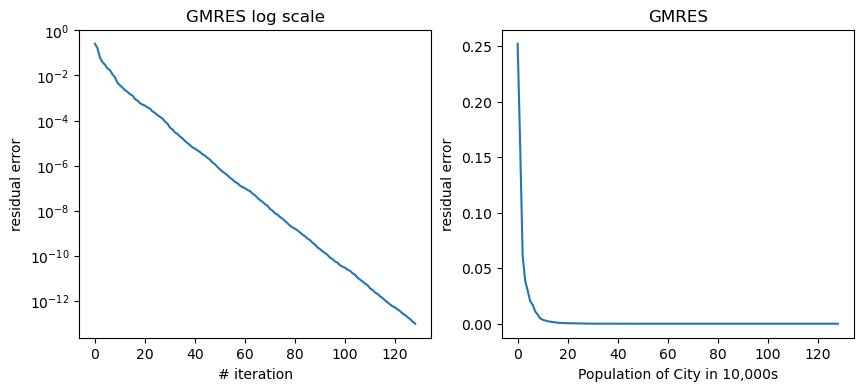

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(residual_errors)
ax1.set_title('GMRES log scale')
ax1.set_xlabel('# iteration')
ax1.set_ylabel('residual error')
ax1.set_yscale('log')

ax2.plot(residual_errors)
ax2.set_title('GMRES')
ax2.set_xlabel('Population of City in 10,000s')
ax2.set_ylabel('residual error')